## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
columns = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=columns)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [5]:
# Merge 2 dataet together
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# EDA

In [6]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [7]:
df.groupby('title')['rating'].mean().head()

title
'Til There Was You (1997)    2.333333
1-900 (1994)                 2.600000
101 Dalmatians (1996)        2.908257
12 Angry Men (1957)          4.344000
187 (1997)                   3.024390
Name: rating, dtype: float64

In [8]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [9]:
# Find the movies with the highest number of ratings

In [10]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [11]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [12]:
ratings['number_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,number_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


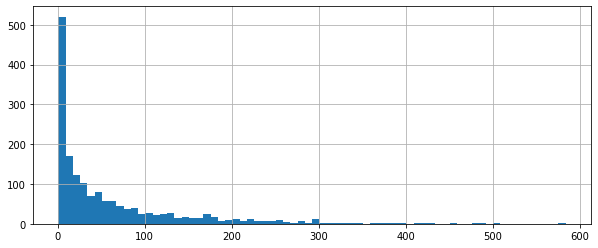

In [13]:
#We can see from the below figure that most of the movies have few number of ratings.
plt.figure(figsize=(10,4))
ratings['number_ratings'].hist(bins=70)

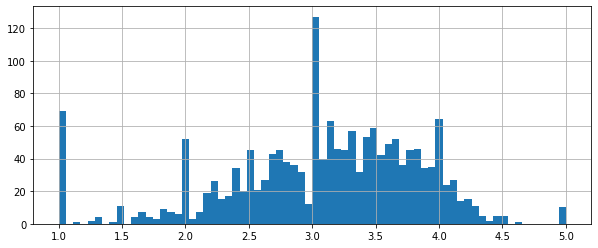

In [14]:
# This histogram shows the distribution of rating 
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

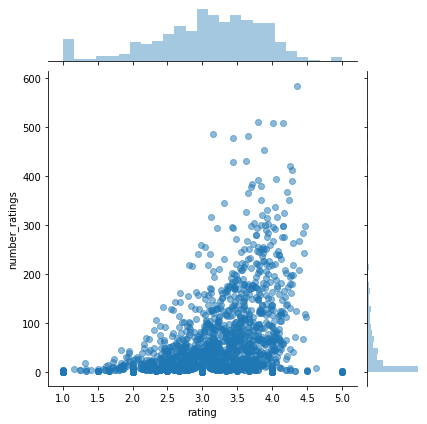

In [15]:
# More rating highest number of rating
sns.jointplot(x='rating',y='number_ratings',data=ratings,alpha=0.5)
plt.show()

## Recommender System

In [16]:
movie_matrix = df.pivot_table(index='user_id',columns='title',values='rating')

In [17]:
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
ratings.sort_values('number_ratings',ascending=False).head(5)

,rating,number_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [19]:
#Select user ratings for two movies 
starwars_user_ratings = movie_matrix['Star Wars (1977)']
liarliar_user_ratings = movie_matrix['Liar Liar (1997)']

In [20]:
# shows the rating of every users for this movie
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [21]:
liarliar_user_ratings.head()

user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
Name: Liar Liar (1997), dtype: float64

In [22]:
# Find correlations between series with corrwith (instead of corr)
import warnings
warnings.filterwarnings("ignore")

similar_to_starwars = movie_matrix.corrwith(starwars_user_ratings)
similar_to_liarliar = movie_matrix.corrwith(liarliar_user_ratings)

In [23]:
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [24]:
# Removing NaN values and using a DataFrame instead of a series 
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)

corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)

In [25]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [26]:
corr_liarliar.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
"Bonheur, Le (1965)",1.0
For Ever Mozart (1996),1.0
Crossfire (1947),1.0
Johnny 100 Pesos (1993),1.0
Moonlight and Valentino (1995),1.0
Mina Tannenbaum (1994),1.0
"Stranger, The (1994)",1.0
"Wooden Man's Bride, The (Wu Kui) (1994)",1.0
Legal Deceit (1997),1.0


In [27]:
#Filtering out movies that have less than 100 reviews (based off the histogram from earlier)

In [28]:
corr_starwars = corr_starwars.join(ratings['number_ratings'])
corr_starwars.head()

,Correlation,number_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [29]:
corr_starwars[corr_starwars['number_ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,number_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [30]:
corr_liarliar = corr_liarliar.join(ratings['number_ratings'])
corr_liarliar[corr_liarliar['number_ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,number_ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


# Fast AI

In [31]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [94]:
# import collaborative filtering package
from fastai.collab import *

In [95]:
# Turn the title columns in category codes(to replace them with their codes for an Embedding layer)
# size of our validation set = 0.1
# we can add rating_name and user_name too.

data = CollabDataBunch.from_df(df, seed=42, valid_pct=0.1, item_name='title')

In [96]:
#show a random batch of our data
data.show_batch()

user_id,title,target
89,Mission: Impossible (1996),3.0
805,Thinner (1996),1.0
373,Crimson Tide (1995),3.0
864,Far From Home: The Adventures of Yellow Dog (1995),3.0
637,Night Falls on Manhattan (1997),2.0


## 1) EmbeddingDotBias Model

In [97]:
#getting the max and min values of our ratings
df.rating.min(), df.rating.max()

(1, 5)

In [98]:
# creat Learner object (our model)
# n_factors represents the size of the embedding vectors
learn = collab_learner(data, n_factors=40, y_range=(1, 5), wd=1e-1)

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


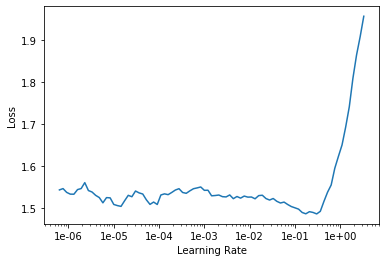

In [37]:
# find the perfect learning rates we can use the lr_find 
learn.lr_find()
# plot learning rate graph
learn.recorder.plot() 

In [38]:
# Train our model using the fit_one_cycle method
learn.fit_one_cycle(4, 5e-3)

epoch,train_loss,valid_loss,time
0,0.939081,0.918000,00:10
1,0.825128,0.857589,00:11
2,0.753173,0.815055,00:11
3,0.665095,0.810759,00:10


In [39]:
learn.save('movie-dot-1')

# Interpretation

In [99]:
learn.load('movie-dot-1');

In [100]:
# Find 1000 movies with the most ratings
g = df.groupby('title')['rating'].count()
g.sort_values(ascending=False)[:1000]

title
Star Wars (1977)                       584
Contact (1997)                         509
Fargo (1996)                           508
Return of the Jedi (1983)              507
Liar Liar (1997)                       485
                                      ... 
Selena (1997)                           16
In the Bleak Midwinter (1995)           16
Party Girl (1995)                       16
Highlander III: The Sorcerer (1994)     16
Bastard Out of Carolina (1996)          16
Name: rating, Length: 1000, dtype: int64

In [101]:
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

In [102]:
movie_bias = learn.bias(top_movies, is_item=True) #set true for items and set false for users
movie_bias.shape

torch.Size([1000])

In [103]:
mean_ratings = df.groupby('title')['rating'].mean()
movie_ratings = [(b, i, mean_ratings.loc[i], g.loc[i]) for i,b in zip(top_movies,movie_bias)]

In [104]:
item0 = lambda o:o[0]

In [105]:
lowest_bias = sorted(movie_ratings, key=item0)[:1000]
lowest_bias[:10]

[(tensor(-0.4355),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106,
  19),
 (tensor(-0.3879), 'Cable Guy, The (1996)', 2.339622641509434, 106),
 (tensor(-0.3749),
  'Mortal Kombat: Annihilation (1997)',
  1.9534883720930232,
  43),
 (tensor(-0.3505), 'Crow: City of Angels, The (1996)', 1.9487179487179487, 39),
 (tensor(-0.3304), "McHale's Navy (1997)", 2.1884057971014492, 69),
 (tensor(-0.3135),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142,
  21),
 (tensor(-0.3129), 'Grease 2 (1982)', 2.0, 24),
 (tensor(-0.3118), 'Barb Wire (1996)', 1.9333333333333333, 30),
 (tensor(-0.3104), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053, 57),
 (tensor(-0.3095), 'Showgirls (1995)', 1.9565217391304348, 23)]

In [74]:
# Find 1000 movies with the most ratings
g = df.groupby('item_id')['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies = top_movies.astype(str)
top_movies[:10]

array(['50', '258', '100', '181', '294', '286', '288', '1', '300', '121'], dtype='<U21')

In [75]:
# create array containing the names of the top movies
top_movies_with_name = []
for movie in top_movies:
    top_movies_with_name.append(df[(df['item_id']==int(movie))]['title'].iloc[0])
top_movies_with_name = np.array(top_movies_with_name)
top_movies_with_name

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', ..., 'Bad Taste (1987)',
       'Jaws 3-D (1983)', 'Stuart Saves His Family (1995)', 'When the Cats Away (Chacun cherche son chat) (1996)'],
      dtype='<U79')

## Movie bias

We can extract the biases for the top movies as well as the mean rating of the top movies and print them out. 

With this, we can get information about the movies that are generally rated low or high no matter what user is rating them.

In [61]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(945, 40)
  (i_weight): Embedding(1651, 40)
  (u_bias): Embedding(945, 1)
  (i_bias): Embedding(1651, 1)
)

In [76]:
mean_ratings = df.groupby('item_id')['rating'].mean()
movie_ratings = [(b, top_movies_with_name[i], mean_ratings.loc[int(tb)]) for i, (tb, b) in
                enumerate(zip(top_movies, movie_bias))]

In [108]:
sorted_movie_ratings= sorted(movie_ratings,key=item0)

### Similar movies to Star Wars (1977)

In [117]:
sorted_movie_ratings[-10:]

[(tensor(0.5308), 'Close Shave, A (1995)', 4.491071428571429, 112),
 (tensor(0.5350), 'As Good As It Gets (1997)', 4.196428571428571, 112),
 (tensor(0.5475), 'Rear Window (1954)', 4.3875598086124405, 209),
 (tensor(0.5536), 'Shawshank Redemption, The (1994)', 4.445229681978798, 283),
 (tensor(0.5684), 'Star Wars (1977)', 4.359589041095891, 584),
 (tensor(0.5724), 'Good Will Hunting (1997)', 4.262626262626263, 198),
 (tensor(0.5767), 'L.A. Confidential (1997)', 4.161616161616162, 297),
 (tensor(0.5769), 'Silence of the Lambs, The (1991)', 4.28974358974359, 390),
 (tensor(0.5956), "Schindler's List (1993)", 4.466442953020135, 298),
 (tensor(0.6696), 'Titanic (1997)', 4.2457142857142856, 350)]

### Similar movies to Liar Liar (1997)

In [155]:
sorted_movie_ratings[442:453]

[(tensor(0.0364), 'Rising Sun (1993)', 2.9069767441860463, 43),
 (tensor(0.0365),
  'Hunchback of Notre Dame, The (1996)',
  3.377952755905512,
  127),
 (tensor(0.0365),
  'Homeward Bound: The Incredible Journey (1993)',
  3.2131147540983607,
  61),
 (tensor(0.0368), 'Dumbo (1941)', 3.4959349593495936, 123),
 (tensor(0.0368), 'Liar Liar (1997)', 3.156701030927835, 485),
 (tensor(0.0369), "Microcosmos: Le peuple de l'herbe (1996)", 3.75, 24),
 (tensor(0.0373), 'Othello (1995)', 3.611111111111111, 72),
 (tensor(0.0373), 'Breakdown (1997)', 3.4025974025974026, 77),
 (tensor(0.0382), 'Bottle Rocket (1996)', 3.4545454545454546, 44),
 (tensor(0.0385),
  'Adventures of Pinocchio, The (1996)',
  3.051282051282051,
  39),
 (tensor(0.0388), 'Sword in the Stone, The (1963)', 3.3292682926829267, 82)]

In [77]:
# print movie bias information
print(sorted(movie_ratings, key=item0)[:5])
print('\n')
print(sorted(movie_ratings, key=item0, reverse=True)[:5])

[(tensor(-0.4355), 'Specialist, The (1994)', 2.25), (tensor(-0.3879), "William Shakespeare's Romeo and Juliet (1996)", 3.5943396226415096), (tensor(-0.3749), 'Air Bud (1997)', 2.558139534883721), (tensor(-0.3505), 'Swiss Family Robinson (1960)', 3.358974358974359), (tensor(-0.3304), "McHale's Navy (1997)", 2.1884057971014492)]


[(tensor(0.6696), 'Mission: Impossible (1996)', 3.313953488372093), (tensor(0.5956), 'Leaving Las Vegas (1995)', 3.697986577181208), (tensor(0.5769), 'Silence of the Lambs, The (1991)', 4.28974358974359), (tensor(0.5767), 'Terminator 2: Judgment Day (1991)', 4.0067796610169495), (tensor(0.5724), 'Good Will Hunting (1997)', 4.262626262626263)]


In [78]:
# (bias, movie, mean_rate,number_of_rate)
lowest_bias = sorted(movie_ratings, key=item0)[:1000]
lowest_bias[:10]

[(tensor(-0.4355), 'Specialist, The (1994)', 2.25),
 (tensor(-0.3879),
  "William Shakespeare's Romeo and Juliet (1996)",
  3.5943396226415096),
 (tensor(-0.3749), 'Air Bud (1997)', 2.558139534883721),
 (tensor(-0.3505), 'Swiss Family Robinson (1960)', 3.358974358974359),
 (tensor(-0.3304), "McHale's Navy (1997)", 2.1884057971014492),
 (tensor(-0.3135), 'Pallbearer, The (1996)', 2.3181818181818183),
 (tensor(-0.3129), 'Drop Dead Fred (1991)', 2.75),
 (tensor(-0.3118), 'Drop Zone (1994)', 2.5483870967741935),
 (tensor(-0.3104), 'Bedknobs and Broomsticks (1971)', 3.0701754385964914),
 (tensor(-0.3095), 'Fools Rush In (1997)', 3.0)]

In [79]:
#There are some movies with high mean rating and the model has provided a low bias
# These movies rated by a small number of user and cannot be considered generally good.
list(filter(lambda a: a[2] >=3 , lowest_bias))[:10]

[(tensor(-0.3879),
  "William Shakespeare's Romeo and Juliet (1996)",
  3.5943396226415096),
 (tensor(-0.3505), 'Swiss Family Robinson (1960)', 3.358974358974359),
 (tensor(-0.3104), 'Bedknobs and Broomsticks (1971)', 3.0701754385964914),
 (tensor(-0.3095), 'Fools Rush In (1997)', 3.0),
 (tensor(-0.3074), 'Cyrano de Bergerac (1990)', 3.8181818181818183),
 (tensor(-0.2808), 'Smoke (1995)', 3.6216216216216215),
 (tensor(-0.2662), 'M (1931)', 4.0),
 (tensor(-0.2565), 'Get on the Bus (1996)', 3.3157894736842106),
 (tensor(-0.2558), 'Robin Hood: Prince of Thieves (1991)', 3.2266666666666666),
 (tensor(-0.2525), 'Quick and the Dead, The (1995)', 3.2083333333333335)]

In [88]:
# get weights
movie_w = learn.weight(top_movies, is_item=True)

In [89]:
# transform weights to 3 dimensions
movie_pca = movie_w.pca(3)

In [90]:
# get prinicipal components
fac0,fac1,fac2 = movie_pca.t()
movie_comp = [(f, i) for f,i in zip(fac0, top_movies_with_name)]

In [91]:
# print fac0 information
print(sorted(movie_comp, key=itemgetter(0), reverse=True)[:10])
print(sorted(movie_comp, key=itemgetter(0))[:10])



[(tensor(1.7338), "McHale's Navy (1997)"), (tensor(1.5666), 'M (1931)'), (tensor(1.5098), 'Transformers: The Movie, The (1986)'), (tensor(1.4698), 'Air Bud (1997)'), (tensor(1.4672), 'Drop Dead Fred (1991)'), (tensor(1.4560), 'Love! Valour! Compassion! (1997)'), (tensor(1.4345), 'Wishmaster (1997)'), (tensor(1.4338), 'Jungle2Jungle (1997)'), (tensor(1.3830), 'Specialist, The (1994)'), (tensor(1.3473), 'Get on the Bus (1996)')]
[(tensor(-1.5641), 'Casablanca (1942)'), (tensor(-1.5292), 'One Fine Day (1996)'), (tensor(-1.4955), 'Godfather, The (1972)'), (tensor(-1.4137), 'Crying Game, The (1992)'), (tensor(-1.3043), "One Flew Over the Cuckoo's Nest (1975)"), (tensor(-1.3003), 'River Wild, The (1994)'), (tensor(-1.2933), 'Leaving Las Vegas (1995)'), (tensor(-1.2883), 'Snow White and the Seven Dwarfs (1937)'), (tensor(-1.2825), 'Jaws (1975)'), (tensor(-1.2624), 'Citizen Kane (1941)')]


In [92]:
# print fac1 information
movie_comp = [(f, i) for f,i in zip(fac1, top_movies_with_name)]
print(sorted(movie_comp, key=itemgetter(0), reverse=True)[:10])
print(sorted(movie_comp, key=itemgetter(0))[:10])

[(tensor(1.3708), 'Braveheart (1995)'), (tensor(1.3597), 'Raiders of the Lost Ark (1981)'), (tensor(1.2923), 'Mission: Impossible (1996)'), (tensor(1.1772), 'Independence Day (ID4) (1996)'), (tensor(1.1195), 'Stand by Me (1986)'), (tensor(1.1071), 'Lion King, The (1994)'), (tensor(1.0563), 'Star Wars (1977)'), (tensor(1.0215), 'George of the Jungle (1997)'), (tensor(1.0198), 'Return of the Jedi (1983)'), (tensor(0.9984), 'Conspiracy Theory (1997)')]
[(tensor(-1.0497), 'Amateur (1994)'), (tensor(-0.9471), 'Courage Under Fire (1996)'), (tensor(-0.9430), 'Sabrina (1954)'), (tensor(-0.8690), 'In the Mouth of Madness (1995)'), (tensor(-0.8669), 'Strange Days (1995)'), (tensor(-0.8647), 'Inventing the Abbotts (1997)'), (tensor(-0.8519), 'Cape Fear (1991)'), (tensor(-0.8469), 'It Happened One Night (1934)'), (tensor(-0.8345), 'Trainspotting (1996)'), (tensor(-0.8339), 'Cutthroat Island (1995)')]


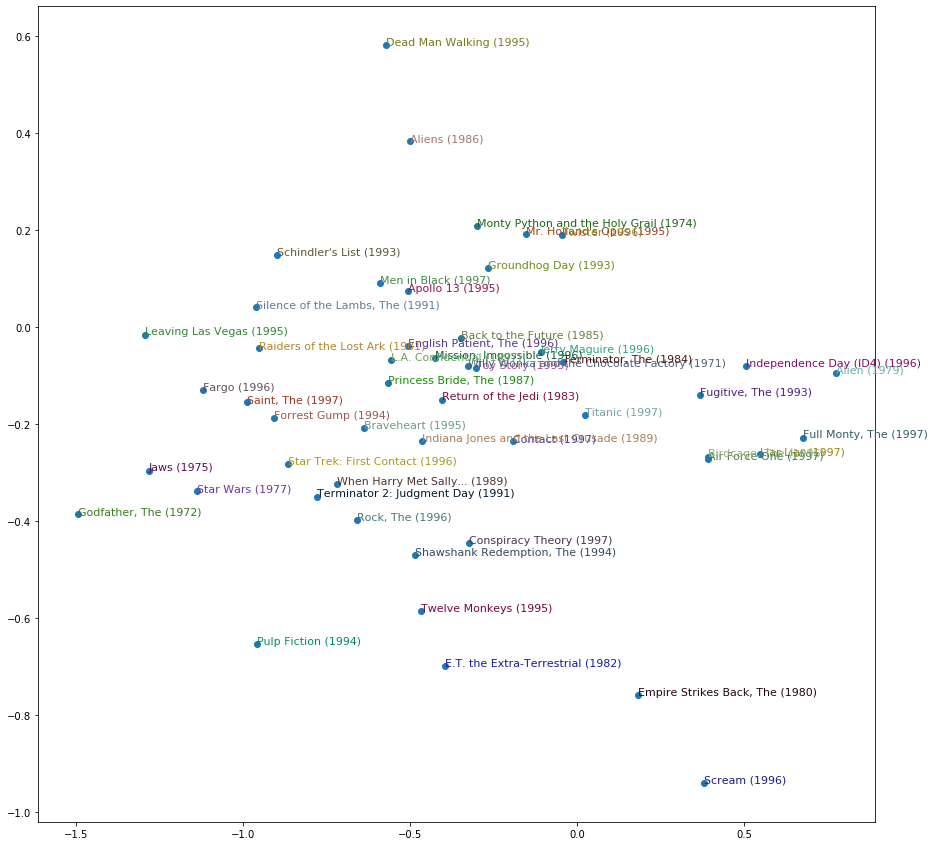

In [93]:
idxs = np.random.choice(len(top_movies_with_name), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies_with_name[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

# Sources
https://course.fast.ai/videos/?lesson=4

https://towardsdatascience.com/collaborative-filtering-with-fastai-3dbdd4ef4f00

https://github.com/TannerGilbert/Tutorials/blob/master/FastAI/Book%20Recommendation%20System.ipynb

https://medium.com/quantyca/deep-learning-for-collaborative-filtering-using-fastai-b28e197ccd59
